# 作业1

![](https://ai-studio-static-online.cdn.bcebos.com/18afa39d2c934189921b95a8a624b6eb97924fadd214418b825a3a9d21ec53c1)


# 作业2

## 1. 安装PaddleX

In [2]:
! pip install paddlex -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple
     |████████████████████████████████| 522kB 14.6MB/s eta 0:00:01
     |████████████████████████████████| 153kB 78.2MB/s eta 0:00:01
     |████████████████████████████████| 102kB 26.3MB/s ta 0:00:01
     |████████████████████████████████| 1.0MB 12.8MB/s eta 0:00:01
  Created wheel for pycocotools: filename=pycocotools-2.0.2-cp37-cp37m-linux_x86_64.whl size=278365 sha256=7308aa001d53f415148142fe6e666c960e8ea2871ec2ce13cdb368a2ebd83a61
  Stored in directory: /home/aistudio/.cache/pip/wheels/fb/44/67/8baa69040569b1edbd7776ec6f82c387663e724908aaa60963
Successfully built pycocotools


## 2. 准备视盘语义分割数据集

In [ ]:
! wget https://bj.bcebos.com/paddlex/datasets/optic_disc_seg.tar.gz
! tar xzf optic_disc_seg.tar.gz

--2021-04-18 20:53:37--  https://bj.bcebos.com/paddlex/datasets/optic_disc_seg.tar.gz
Resolving bj.bcebos.com (bj.bcebos.com)... 182.61.200.195, 182.61.200.229, 2409:8c00:6c21:10ad:0:ff:b00e:67d
Connecting to bj.bcebos.com (bj.bcebos.com)|182.61.200.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19077558 (18M) [application/octet-stream]
Saving to: ‘optic_disc_seg.tar.gz’

optic_disc_seg.tar. 100%[===================>]  18.19M  37.0MB/s    in 0.5s    

2021-04-18 20:53:38 (37.0 MB/s) - ‘optic_disc_seg.tar.gz’ saved [19077558/19077558]



## 3. 模型训练

### 3.1 配置GPU

In [3]:
# 设置使用0号GPU卡（如无GPU，执行此代码后仍然会使用CPU训练模型）
import matplotlib
matplotlib.use('Agg') 
import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import paddlex as pdx

### 3.2 定义图像预处理流程transforms

In [4]:
from paddlex.seg import transforms
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize(target_size=512),
    transforms.RandomPaddingCrop(crop_size=500),
    transforms.Normalize()
])
eval_transforms = transforms.Compose([
    transforms.Resize(512),
    transforms.Normalize()
])

### 3.3 定义数据集Dataset (提供的数据及链接失效了！！！: https://pan.baidu.com/s/1dOre-41p9OX8x3nl9vwL0g  密码: fds9)
### 只能使用别的数据集了

In [5]:
train_dataset = pdx.datasets.SegDataset(
    data_dir='optic_disc_seg',
    file_list='optic_disc_seg/train_list.txt',
    label_list='optic_disc_seg/labels.txt',
    transforms=train_transforms,
    shuffle=True)
eval_dataset = pdx.datasets.SegDataset(
    data_dir='optic_disc_seg',
    file_list='optic_disc_seg/val_list.txt',
    label_list='optic_disc_seg/labels.txt',
    transforms=eval_transforms)

2021-04-18 21:53:46 [INFO]	267 samples in file optic_disc_seg/train_list.txt
2021-04-18 21:53:46 [INFO]	76 samples in file optic_disc_seg/val_list.txt


### 3.4 模型开始训练

In [6]:
num_classes = len(train_dataset.labels)
model = pdx.seg.DeepLabv3p(num_classes=num_classes)
model.train(
    num_epochs=40,
    train_dataset=train_dataset,
    train_batch_size=4,
    eval_dataset=eval_dataset,
    learning_rate=0.01,
    save_interval_epochs=1,
    save_dir='output/deeplab',
    use_vdl=True)

2021-04-18 21:53:51,012-INFO: If regularizer of a Parameter has been set by 'fluid.ParamAttr' or 'fluid.WeightNormParamAttr' already. The Regularization[L2Decay, regularization_coeff=0.000040] in Optimizer will not take effect, and it will only be applied to other Parameters!


2021-04-18 21:53:51 [INFO]	Decompressing output/deeplab/pretrain/MobileNetV2_pretrained.tar...
2021-04-18 21:53:55 [INFO]	Load pretrain weights from output/deeplab/pretrain/MobileNetV2_pretrained.


2021-04-18 21:53:55,529-WARNING: output/deeplab/pretrain/MobileNetV2_pretrained.pdparams not found, try to load model file saved with [ save_params, save_persistables, save_vars ]


2021-04-18 21:53:55 [INFO]	There are 260 varaibles in output/deeplab/pretrain/MobileNetV2_pretrained are loaded.
2021-04-18 21:54:01 [INFO]	[TRAIN] Epoch=1/40, Step=2/66, loss=1.432815, lr=0.009997, time_each_step=2.75s, eta=2:35:35
2021-04-18 21:54:01 [INFO]	[TRAIN] Epoch=1/40, Step=4/66, loss=0.353334, lr=0.00999, time_each_step=1.46s, eta=1:22:25
2021-04-18 21:54:02 [INFO]	[TRAIN] Epoch=1/40, Step=6/66, loss=0.123251, lr=0.009983, time_each_step=1.03s, eta=0:58:20
2021-04-18 21:54:02 [INFO]	[TRAIN] Epoch=1/40, Step=8/66, loss=0.123169, lr=0.009976, time_each_step=0.81s, eta=0:45:57
2021-04-18 21:54:02 [INFO]	[TRAIN] Epoch=1/40, Step=10/66, loss=0.156338, lr=0.009969, time_each_step=0.68s, eta=0:38:30
2021-04-18 21:54:03 [INFO]	[TRAIN] Epoch=1/40, Step=12/66, loss=0.14013, lr=0.009962, time_each_step=0.6s, eta=0:33:49
2021-04-18 21:54:03 [INFO]	[TRAIN] Epoch=1/40, Step=14/66, loss=0.210303, lr=0.009956, time_each_step=0.53s, eta=0:30:1
2021-04-18 21:54:03 [INFO]	[TRAIN] Epoch=1/40, S

100%|██████████| 19/19 [00:03<00:00,  5.18it/s]


2021-04-18 21:54:10 [INFO]	[EVAL] Finished, Epoch=1, miou=0.490819, category_iou=[0.98163875 0.        ], oacc=0.981639, category_acc=[0.98163875 0.        ], kappa=0.0, category_F1-score=[0.99073431 0.        ] .
2021-04-18 21:54:10 [INFO]	Model saved in output/deeplab/best_model.
2021-04-18 21:54:11 [INFO]	Model saved in output/deeplab/epoch_1.
2021-04-18 21:54:11 [INFO]	Current evaluated best model in eval_dataset is epoch_1, miou=0.4908193727031779
2021-04-18 21:54:13 [INFO]	[TRAIN] Epoch=2/40, Step=2/66, loss=0.044452, lr=0.009771, time_each_step=0.19s, eta=0:10:2
2021-04-18 21:54:14 [INFO]	[TRAIN] Epoch=2/40, Step=4/66, loss=0.045499, lr=0.009764, time_each_step=0.2s, eta=0:10:2
2021-04-18 21:54:14 [INFO]	[TRAIN] Epoch=2/40, Step=6/66, loss=0.060221, lr=0.009758, time_each_step=0.21s, eta=0:10:2
2021-04-18 21:54:14 [INFO]	[TRAIN] Epoch=2/40, Step=8/66, loss=0.040262, lr=0.009751, time_each_step=0.21s, eta=0:10:2
2021-04-18 21:54:15 [INFO]	[TRAIN] Epoch=2/40, Step=10/66, loss=0.06

100%|██████████| 19/19 [00:03<00:00,  5.27it/s]


2021-04-18 21:54:23 [INFO]	[EVAL] Finished, Epoch=2, miou=0.490819, category_iou=[0.98163875 0.        ], oacc=0.981639, category_acc=[0.98163875 0.        ], kappa=0.0, category_F1-score=[0.99073431 0.        ] .
2021-04-18 21:54:23 [INFO]	Model saved in output/deeplab/epoch_2.
2021-04-18 21:54:23 [INFO]	Current evaluated best model in eval_dataset is epoch_1, miou=0.4908193727031779
2021-04-18 21:54:26 [INFO]	[TRAIN] Epoch=3/40, Step=2/66, loss=0.028353, lr=0.009545, time_each_step=0.19s, eta=0:7:52
2021-04-18 21:54:26 [INFO]	[TRAIN] Epoch=3/40, Step=4/66, loss=0.026166, lr=0.009539, time_each_step=0.19s, eta=0:7:52
2021-04-18 21:54:26 [INFO]	[TRAIN] Epoch=3/40, Step=6/66, loss=0.045191, lr=0.009532, time_each_step=0.2s, eta=0:7:52
2021-04-18 21:54:26 [INFO]	[TRAIN] Epoch=3/40, Step=8/66, loss=0.025478, lr=0.009525, time_each_step=0.21s, eta=0:7:52
2021-04-18 21:54:27 [INFO]	[TRAIN] Epoch=3/40, Step=10/66, loss=0.050081, lr=0.009518, time_each_step=0.22s, eta=0:7:52
2021-04-18 21:54:

100%|██████████| 19/19 [00:04<00:00,  4.53it/s]


2021-04-18 21:54:36 [INFO]	[EVAL] Finished, Epoch=3, miou=0.490819, category_iou=[0.98163875 0.        ], oacc=0.981639, category_acc=[0.98163875 0.        ], kappa=0.0, category_F1-score=[0.99073431 0.        ] .
2021-04-18 21:54:36 [INFO]	Model saved in output/deeplab/epoch_3.
2021-04-18 21:54:36 [INFO]	Current evaluated best model in eval_dataset is epoch_1, miou=0.4908193727031779
2021-04-18 21:54:40 [INFO]	[TRAIN] Epoch=4/40, Step=2/66, loss=0.019691, lr=0.009319, time_each_step=0.25s, eta=0:8:3
2021-04-18 21:54:40 [INFO]	[TRAIN] Epoch=4/40, Step=4/66, loss=0.021092, lr=0.009312, time_each_step=0.26s, eta=0:8:3
2021-04-18 21:54:40 [INFO]	[TRAIN] Epoch=4/40, Step=6/66, loss=0.020048, lr=0.009305, time_each_step=0.26s, eta=0:8:3
2021-04-18 21:54:41 [INFO]	[TRAIN] Epoch=4/40, Step=8/66, loss=0.027402, lr=0.009298, time_each_step=0.27s, eta=0:8:3
2021-04-18 21:54:41 [INFO]	[TRAIN] Epoch=4/40, Step=10/66, loss=0.030186, lr=0.009291, time_each_step=0.28s, eta=0:8:3
2021-04-18 21:54:41 [

100%|██████████| 19/19 [00:06<00:00,  3.00it/s]


2021-04-18 21:54:53 [INFO]	[EVAL] Finished, Epoch=4, miou=0.490819, category_iou=[0.98163875 0.        ], oacc=0.981639, category_acc=[0.98163875 0.        ], kappa=0.0, category_F1-score=[0.99073431 0.        ] .
2021-04-18 21:54:53 [INFO]	Model saved in output/deeplab/epoch_4.
2021-04-18 21:54:53 [INFO]	Current evaluated best model in eval_dataset is epoch_1, miou=0.4908193727031779
2021-04-18 21:54:56 [INFO]	[TRAIN] Epoch=5/40, Step=2/66, loss=0.01567, lr=0.009092, time_each_step=0.22s, eta=0:10:16
2021-04-18 21:54:56 [INFO]	[TRAIN] Epoch=5/40, Step=4/66, loss=0.014881, lr=0.009085, time_each_step=0.23s, eta=0:10:16
2021-04-18 21:54:57 [INFO]	[TRAIN] Epoch=5/40, Step=6/66, loss=0.015745, lr=0.009078, time_each_step=0.24s, eta=0:10:16
2021-04-18 21:54:57 [INFO]	[TRAIN] Epoch=5/40, Step=8/66, loss=0.014278, lr=0.009071, time_each_step=0.24s, eta=0:10:16
2021-04-18 21:54:57 [INFO]	[TRAIN] Epoch=5/40, Step=10/66, loss=0.017189, lr=0.009064, time_each_step=0.25s, eta=0:10:16
2021-04-18 2

100%|██████████| 19/19 [00:05<00:00,  3.72it/s]


2021-04-18 21:55:07 [INFO]	[EVAL] Finished, Epoch=5, miou=0.490819, category_iou=[0.98163875 0.        ], oacc=0.981639, category_acc=[0.98163875 0.        ], kappa=0.0, category_F1-score=[0.99073431 0.        ] .
2021-04-18 21:55:08 [INFO]	Model saved in output/deeplab/epoch_5.
2021-04-18 21:55:08 [INFO]	Current evaluated best model in eval_dataset is epoch_1, miou=0.4908193727031779
2021-04-18 21:55:13 [INFO]	[TRAIN] Epoch=6/40, Step=2/66, loss=0.012238, lr=0.008864, time_each_step=0.31s, eta=0:8:49
2021-04-18 21:55:13 [INFO]	[TRAIN] Epoch=6/40, Step=4/66, loss=0.014035, lr=0.008857, time_each_step=0.32s, eta=0:8:49
2021-04-18 21:55:13 [INFO]	[TRAIN] Epoch=6/40, Step=6/66, loss=0.028335, lr=0.00885, time_each_step=0.33s, eta=0:8:49
2021-04-18 21:55:14 [INFO]	[TRAIN] Epoch=6/40, Step=8/66, loss=0.010017, lr=0.008843, time_each_step=0.34s, eta=0:8:49
2021-04-18 21:55:14 [INFO]	[TRAIN] Epoch=6/40, Step=10/66, loss=0.022394, lr=0.008837, time_each_step=0.34s, eta=0:8:48
2021-04-18 21:55:

100%|██████████| 19/19 [00:05<00:00,  3.70it/s]


2021-04-18 21:55:24 [INFO]	[EVAL] Finished, Epoch=6, miou=0.508924, category_iou=[0.98223058 0.03561734], oacc=0.982242, category_acc=[0.98228204 0.92606635], kappa=0.067513, category_F1-score=[0.99103564 0.06878475] .
2021-04-18 21:55:25 [INFO]	Model saved in output/deeplab/best_model.
2021-04-18 21:55:25 [INFO]	Model saved in output/deeplab/epoch_6.
2021-04-18 21:55:25 [INFO]	Current evaluated best model in eval_dataset is epoch_6, miou=0.5089239562601987
2021-04-18 21:55:30 [INFO]	[TRAIN] Epoch=7/40, Step=2/66, loss=0.013601, lr=0.008636, time_each_step=0.3s, eta=0:10:7
2021-04-18 21:55:30 [INFO]	[TRAIN] Epoch=7/40, Step=4/66, loss=0.013864, lr=0.008629, time_each_step=0.31s, eta=0:10:7
2021-04-18 21:55:31 [INFO]	[TRAIN] Epoch=7/40, Step=6/66, loss=0.01228, lr=0.008622, time_each_step=0.32s, eta=0:10:7
2021-04-18 21:55:31 [INFO]	[TRAIN] Epoch=7/40, Step=8/66, loss=0.00959, lr=0.008615, time_each_step=0.34s, eta=0:10:8
2021-04-18 21:55:32 [INFO]	[TRAIN] Epoch=7/40, Step=10/66, loss=0

100%|██████████| 19/19 [00:05<00:00,  3.34it/s]


2021-04-18 21:55:43 [INFO]	[EVAL] Finished, Epoch=7, miou=0.627901, category_iou=[0.9850676  0.27073481], oacc=0.98515, category_acc=[0.98705445 0.73361689], kappa=0.419921, category_F1-score=[0.99247764 0.42610748] .
2021-04-18 21:55:44 [INFO]	Model saved in output/deeplab/best_model.
2021-04-18 21:55:44 [INFO]	Model saved in output/deeplab/epoch_7.
2021-04-18 21:55:44 [INFO]	Current evaluated best model in eval_dataset is epoch_7, miou=0.6279012015115114
2021-04-18 21:55:50 [INFO]	[TRAIN] Epoch=8/40, Step=2/66, loss=0.01521, lr=0.008407, time_each_step=0.35s, eta=0:10:23
2021-04-18 21:55:50 [INFO]	[TRAIN] Epoch=8/40, Step=4/66, loss=0.016058, lr=0.0084, time_each_step=0.35s, eta=0:10:23
2021-04-18 21:55:50 [INFO]	[TRAIN] Epoch=8/40, Step=6/66, loss=0.022937, lr=0.008393, time_each_step=0.36s, eta=0:10:23
2021-04-18 21:55:51 [INFO]	[TRAIN] Epoch=8/40, Step=8/66, loss=0.024295, lr=0.008386, time_each_step=0.37s, eta=0:10:22
2021-04-18 21:55:51 [INFO]	[TRAIN] Epoch=8/40, Step=10/66, los

100%|██████████| 19/19 [00:08<00:00,  2.30it/s]


2021-04-18 21:56:04 [INFO]	[EVAL] Finished, Epoch=8, miou=0.662921, category_iou=[0.97650815 0.34933373], oacc=0.976801, category_acc=[0.99391302 0.41868567], kappa=0.506583, category_F1-score=[0.98811447 0.51778699] .
2021-04-18 21:56:04 [INFO]	Model saved in output/deeplab/best_model.
2021-04-18 21:56:05 [INFO]	Model saved in output/deeplab/epoch_8.
2021-04-18 21:56:05 [INFO]	Current evaluated best model in eval_dataset is epoch_8, miou=0.6629209409927949
2021-04-18 21:56:07 [INFO]	[TRAIN] Epoch=9/40, Step=2/66, loss=0.0179, lr=0.008177, time_each_step=0.2s, eta=0:10:57
2021-04-18 21:56:08 [INFO]	[TRAIN] Epoch=9/40, Step=4/66, loss=0.007784, lr=0.00817, time_each_step=0.21s, eta=0:10:57
2021-04-18 21:56:08 [INFO]	[TRAIN] Epoch=9/40, Step=6/66, loss=0.021936, lr=0.008163, time_each_step=0.22s, eta=0:10:57
2021-04-18 21:56:08 [INFO]	[TRAIN] Epoch=9/40, Step=8/66, loss=0.01387, lr=0.008156, time_each_step=0.23s, eta=0:10:57
2021-04-18 21:56:09 [INFO]	[TRAIN] Epoch=9/40, Step=10/66, loss

100%|██████████| 19/19 [00:05<00:00,  3.68it/s]


2021-04-18 21:56:19 [INFO]	[EVAL] Finished, Epoch=9, miou=0.651463, category_iou=[0.97153079 0.33139431], oacc=0.971927, category_acc=[0.99537971 0.37064929], kappa=0.485118, category_F1-score=[0.98555985 0.49781542] .
2021-04-18 21:56:19 [INFO]	Model saved in output/deeplab/epoch_9.
2021-04-18 21:56:19 [INFO]	Current evaluated best model in eval_dataset is epoch_8, miou=0.6629209409927949
2021-04-18 21:56:29 [INFO]	[TRAIN] Epoch=10/40, Step=2/66, loss=0.010793, lr=0.007947, time_each_step=0.59s, eta=0:7:56
2021-04-18 21:56:30 [INFO]	[TRAIN] Epoch=10/40, Step=4/66, loss=0.010619, lr=0.00794, time_each_step=0.59s, eta=0:7:55
2021-04-18 21:56:30 [INFO]	[TRAIN] Epoch=10/40, Step=6/66, loss=0.015181, lr=0.007933, time_each_step=0.6s, eta=0:7:54
2021-04-18 21:56:30 [INFO]	[TRAIN] Epoch=10/40, Step=8/66, loss=0.007045, lr=0.007926, time_each_step=0.61s, eta=0:7:54
2021-04-18 21:56:31 [INFO]	[TRAIN] Epoch=10/40, Step=10/66, loss=0.017873, lr=0.007919, time_each_step=0.62s, eta=0:7:53
2021-04-

100%|██████████| 19/19 [00:05<00:00,  3.36it/s]


2021-04-18 21:56:41 [INFO]	[EVAL] Finished, Epoch=10, miou=0.60672, category_iou=[0.95457334 0.2588672 ], oacc=0.955283, category_acc=[0.99709022 0.2711925 ], kappa=0.394407, category_F1-score=[0.97675879 0.41127006] .
2021-04-18 21:56:42 [INFO]	Model saved in output/deeplab/epoch_10.
2021-04-18 21:56:42 [INFO]	Current evaluated best model in eval_dataset is epoch_8, miou=0.6629209409927949
2021-04-18 21:56:46 [INFO]	[TRAIN] Epoch=11/40, Step=2/66, loss=0.011421, lr=0.007715, time_each_step=0.31s, eta=0:11:17
2021-04-18 21:56:47 [INFO]	[TRAIN] Epoch=11/40, Step=4/66, loss=0.011067, lr=0.007708, time_each_step=0.32s, eta=0:11:17
2021-04-18 21:56:47 [INFO]	[TRAIN] Epoch=11/40, Step=6/66, loss=0.010673, lr=0.007701, time_each_step=0.32s, eta=0:11:17
2021-04-18 21:56:47 [INFO]	[TRAIN] Epoch=11/40, Step=8/66, loss=0.010139, lr=0.007694, time_each_step=0.33s, eta=0:11:17
2021-04-18 21:56:48 [INFO]	[TRAIN] Epoch=11/40, Step=10/66, loss=0.034144, lr=0.007687, time_each_step=0.34s, eta=0:11:17


100%|██████████| 19/19 [00:04<00:00,  4.09it/s]


2021-04-18 21:56:57 [INFO]	[EVAL] Finished, Epoch=11, miou=0.645451, category_iou=[0.96695364 0.32394868], oacc=0.967469, category_acc=[0.99709526 0.34375875], kappa=0.475662, category_F1-score=[0.98319922 0.48936743] .
2021-04-18 21:56:57 [INFO]	Model saved in output/deeplab/epoch_11.
2021-04-18 21:56:57 [INFO]	Current evaluated best model in eval_dataset is epoch_8, miou=0.6629209409927949
2021-04-18 21:57:01 [INFO]	[TRAIN] Epoch=12/40, Step=2/66, loss=0.008726, lr=0.007483, time_each_step=0.22s, eta=0:7:40
2021-04-18 21:57:01 [INFO]	[TRAIN] Epoch=12/40, Step=4/66, loss=0.01207, lr=0.007476, time_each_step=0.23s, eta=0:7:40
2021-04-18 21:57:01 [INFO]	[TRAIN] Epoch=12/40, Step=6/66, loss=0.008981, lr=0.007469, time_each_step=0.24s, eta=0:7:41
2021-04-18 21:57:02 [INFO]	[TRAIN] Epoch=12/40, Step=8/66, loss=0.011511, lr=0.007462, time_each_step=0.25s, eta=0:7:41
2021-04-18 21:57:02 [INFO]	[TRAIN] Epoch=12/40, Step=10/66, loss=0.009596, lr=0.007455, time_each_step=0.26s, eta=0:7:41
2021-

100%|██████████| 19/19 [00:05<00:00,  3.31it/s]


2021-04-18 21:57:12 [INFO]	[EVAL] Finished, Epoch=12, miou=0.65884, category_iou=[0.96898155 0.34869825], oacc=0.969488, category_acc=[0.99787927 0.36445736], kappa=0.504172, category_F1-score=[0.98424645 0.51708861] .
2021-04-18 21:57:13 [INFO]	Model saved in output/deeplab/epoch_12.
2021-04-18 21:57:13 [INFO]	Current evaluated best model in eval_dataset is epoch_8, miou=0.6629209409927949
2021-04-18 21:57:19 [INFO]	[TRAIN] Epoch=13/40, Step=2/66, loss=0.006052, lr=0.007251, time_each_step=0.36s, eta=0:7:24
2021-04-18 21:57:19 [INFO]	[TRAIN] Epoch=13/40, Step=4/66, loss=0.012107, lr=0.007244, time_each_step=0.37s, eta=0:7:24
2021-04-18 21:57:19 [INFO]	[TRAIN] Epoch=13/40, Step=6/66, loss=0.009535, lr=0.007237, time_each_step=0.38s, eta=0:7:24
2021-04-18 21:57:20 [INFO]	[TRAIN] Epoch=13/40, Step=8/66, loss=0.013229, lr=0.007229, time_each_step=0.39s, eta=0:7:24
2021-04-18 21:57:20 [INFO]	[TRAIN] Epoch=13/40, Step=10/66, loss=0.015639, lr=0.007222, time_each_step=0.4s, eta=0:7:23
2021-0

100%|██████████| 19/19 [00:06<00:00,  2.83it/s]


2021-04-18 21:57:31 [INFO]	[EVAL] Finished, Epoch=13, miou=0.740814, category_iou=[0.98345826 0.49816971], oacc=0.983726, category_acc=[0.99772579 0.5345207 ], kappa=0.657207, category_F1-score=[0.99166015 0.66503775] .
2021-04-18 21:57:32 [INFO]	Model saved in output/deeplab/best_model.
2021-04-18 21:57:32 [INFO]	Model saved in output/deeplab/epoch_13.
2021-04-18 21:57:32 [INFO]	Current evaluated best model in eval_dataset is epoch_13, miou=0.7408139841426349
2021-04-18 21:57:35 [INFO]	[TRAIN] Epoch=14/40, Step=2/66, loss=0.010014, lr=0.007017, time_each_step=0.23s, eta=0:8:48
2021-04-18 21:57:36 [INFO]	[TRAIN] Epoch=14/40, Step=4/66, loss=0.005104, lr=0.00701, time_each_step=0.24s, eta=0:8:48
2021-04-18 21:57:36 [INFO]	[TRAIN] Epoch=14/40, Step=6/66, loss=0.008539, lr=0.007003, time_each_step=0.24s, eta=0:8:48
2021-04-18 21:57:36 [INFO]	[TRAIN] Epoch=14/40, Step=8/66, loss=0.009192, lr=0.006996, time_each_step=0.25s, eta=0:8:48
2021-04-18 21:57:37 [INFO]	[TRAIN] Epoch=14/40, Step=10/

100%|██████████| 19/19 [00:05<00:00,  3.51it/s]


2021-04-18 21:57:47 [INFO]	[EVAL] Finished, Epoch=14, miou=0.776552, category_iou=[0.98711029 0.56599434], oacc=0.987323, category_acc=[0.99811905 0.6038139 ], kappa=0.716627, category_F1-score=[0.99351334 0.72285618] .
2021-04-18 21:57:47 [INFO]	Model saved in output/deeplab/best_model.
2021-04-18 21:57:48 [INFO]	Model saved in output/deeplab/epoch_14.
2021-04-18 21:57:48 [INFO]	Current evaluated best model in eval_dataset is epoch_14, miou=0.7765523146361326
2021-04-18 21:57:53 [INFO]	[TRAIN] Epoch=15/40, Step=2/66, loss=0.009455, lr=0.006783, time_each_step=0.34s, eta=0:6:53
2021-04-18 21:57:53 [INFO]	[TRAIN] Epoch=15/40, Step=4/66, loss=0.009722, lr=0.006775, time_each_step=0.35s, eta=0:6:53
2021-04-18 21:57:54 [INFO]	[TRAIN] Epoch=15/40, Step=6/66, loss=0.010981, lr=0.006768, time_each_step=0.36s, eta=0:6:53
2021-04-18 21:57:54 [INFO]	[TRAIN] Epoch=15/40, Step=8/66, loss=0.009979, lr=0.006761, time_each_step=0.37s, eta=0:6:53
2021-04-18 21:57:55 [INFO]	[TRAIN] Epoch=15/40, Step=10

100%|██████████| 19/19 [00:08<00:00,  2.15it/s]


2021-04-18 21:58:08 [INFO]	[EVAL] Finished, Epoch=15, miou=0.791574, category_iou=[0.98850886 0.5946392 ], oacc=0.988699, category_acc=[0.99816829 0.63529144], kappa=0.740198, category_F1-score=[0.99422123 0.74579779] .
2021-04-18 21:58:09 [INFO]	Model saved in output/deeplab/best_model.
2021-04-18 21:58:09 [INFO]	Model saved in output/deeplab/epoch_15.
2021-04-18 21:58:09 [INFO]	Current evaluated best model in eval_dataset is epoch_15, miou=0.7915740313609954
2021-04-18 21:58:13 [INFO]	[TRAIN] Epoch=16/40, Step=2/66, loss=0.006653, lr=0.006547, time_each_step=0.25s, eta=0:9:2
2021-04-18 21:58:13 [INFO]	[TRAIN] Epoch=16/40, Step=4/66, loss=0.006416, lr=0.00654, time_each_step=0.26s, eta=0:9:2
2021-04-18 21:58:13 [INFO]	[TRAIN] Epoch=16/40, Step=6/66, loss=0.00878, lr=0.006533, time_each_step=0.26s, eta=0:9:2
2021-04-18 21:58:14 [INFO]	[TRAIN] Epoch=16/40, Step=8/66, loss=0.009825, lr=0.006526, time_each_step=0.27s, eta=0:9:2
2021-04-18 21:58:14 [INFO]	[TRAIN] Epoch=16/40, Step=10/66, l

100%|██████████| 19/19 [00:04<00:00,  4.22it/s]


2021-04-18 21:58:23 [INFO]	[EVAL] Finished, Epoch=16, miou=0.833988, category_iou=[0.99221593 0.67575962], oacc=0.99234, category_acc=[0.99755081 0.75207567], kappa=0.802625, category_F1-score=[0.99609276 0.8065114 ] .
2021-04-18 21:58:24 [INFO]	Model saved in output/deeplab/best_model.
2021-04-18 21:58:24 [INFO]	Model saved in output/deeplab/epoch_16.
2021-04-18 21:58:24 [INFO]	Current evaluated best model in eval_dataset is epoch_16, miou=0.8339877741423766
2021-04-18 21:58:29 [INFO]	[TRAIN] Epoch=17/40, Step=2/66, loss=0.005648, lr=0.006311, time_each_step=0.3s, eta=0:6:13
2021-04-18 21:58:29 [INFO]	[TRAIN] Epoch=17/40, Step=4/66, loss=0.01774, lr=0.006304, time_each_step=0.31s, eta=0:6:13
2021-04-18 21:58:29 [INFO]	[TRAIN] Epoch=17/40, Step=6/66, loss=0.007452, lr=0.006297, time_each_step=0.31s, eta=0:6:12
2021-04-18 21:58:30 [INFO]	[TRAIN] Epoch=17/40, Step=8/66, loss=0.006769, lr=0.006289, time_each_step=0.32s, eta=0:6:12
2021-04-18 21:58:30 [INFO]	[TRAIN] Epoch=17/40, Step=10/66

100%|██████████| 19/19 [00:05<00:00,  3.31it/s]


2021-04-18 21:58:41 [INFO]	[EVAL] Finished, Epoch=17, miou=0.803238, category_iou=[0.9891818  0.61729354], oacc=0.989367, category_acc=[0.99875584 0.64542884], kappa=0.758113, category_F1-score=[0.99456148 0.76336611] .
2021-04-18 21:58:42 [INFO]	Model saved in output/deeplab/epoch_17.
2021-04-18 21:58:42 [INFO]	Current evaluated best model in eval_dataset is epoch_16, miou=0.8339877741423766
2021-04-18 21:58:45 [INFO]	[TRAIN] Epoch=18/40, Step=2/66, loss=0.008832, lr=0.006074, time_each_step=0.24s, eta=0:6:47
2021-04-18 21:58:46 [INFO]	[TRAIN] Epoch=18/40, Step=4/66, loss=0.007813, lr=0.006066, time_each_step=0.25s, eta=0:6:47
2021-04-18 21:58:46 [INFO]	[TRAIN] Epoch=18/40, Step=6/66, loss=0.009309, lr=0.006059, time_each_step=0.26s, eta=0:6:47
2021-04-18 21:58:46 [INFO]	[TRAIN] Epoch=18/40, Step=8/66, loss=0.007129, lr=0.006052, time_each_step=0.27s, eta=0:6:47
2021-04-18 21:58:47 [INFO]	[TRAIN] Epoch=18/40, Step=10/66, loss=0.008008, lr=0.006045, time_each_step=0.28s, eta=0:6:47
202

100%|██████████| 19/19 [00:05<00:00,  3.56it/s]


2021-04-18 21:58:57 [INFO]	[EVAL] Finished, Epoch=18, miou=0.824159, category_iou=[0.99109923 0.65721792], oacc=0.991249, category_acc=[0.99837907 0.70063586], kappa=0.788767, category_F1-score=[0.99552972 0.79315812] .
2021-04-18 21:58:57 [INFO]	Model saved in output/deeplab/epoch_18.
2021-04-18 21:58:57 [INFO]	Current evaluated best model in eval_dataset is epoch_16, miou=0.8339877741423766
2021-04-18 21:59:01 [INFO]	[TRAIN] Epoch=19/40, Step=2/66, loss=0.016203, lr=0.005835, time_each_step=0.24s, eta=0:5:44
2021-04-18 21:59:01 [INFO]	[TRAIN] Epoch=19/40, Step=4/66, loss=0.008667, lr=0.005828, time_each_step=0.24s, eta=0:5:44
2021-04-18 21:59:01 [INFO]	[TRAIN] Epoch=19/40, Step=6/66, loss=0.007744, lr=0.005821, time_each_step=0.25s, eta=0:5:44
2021-04-18 21:59:02 [INFO]	[TRAIN] Epoch=19/40, Step=8/66, loss=0.008506, lr=0.005813, time_each_step=0.26s, eta=0:5:44
2021-04-18 21:59:02 [INFO]	[TRAIN] Epoch=19/40, Step=10/66, loss=0.006652, lr=0.005806, time_each_step=0.26s, eta=0:5:44
202

100%|██████████| 19/19 [00:04<00:00,  4.02it/s]


2021-04-18 21:59:11 [INFO]	[EVAL] Finished, Epoch=19, miou=0.81779, category_iou=[0.9904937  0.64508601], oacc=0.990655, category_acc=[0.99858854 0.68066359], kappa=0.779595, category_F1-score=[0.99522415 0.78425809] .
2021-04-18 21:59:12 [INFO]	Model saved in output/deeplab/epoch_19.
2021-04-18 21:59:12 [INFO]	Current evaluated best model in eval_dataset is epoch_16, miou=0.8339877741423766
2021-04-18 21:59:15 [INFO]	[TRAIN] Epoch=20/40, Step=2/66, loss=0.008213, lr=0.005596, time_each_step=0.23s, eta=0:5:10
2021-04-18 21:59:16 [INFO]	[TRAIN] Epoch=20/40, Step=4/66, loss=0.004691, lr=0.005589, time_each_step=0.24s, eta=0:5:10
2021-04-18 21:59:16 [INFO]	[TRAIN] Epoch=20/40, Step=6/66, loss=0.006557, lr=0.005581, time_each_step=0.25s, eta=0:5:10
2021-04-18 21:59:16 [INFO]	[TRAIN] Epoch=20/40, Step=8/66, loss=0.013756, lr=0.005574, time_each_step=0.26s, eta=0:5:10
2021-04-18 21:59:16 [INFO]	[TRAIN] Epoch=20/40, Step=10/66, loss=0.008362, lr=0.005567, time_each_step=0.27s, eta=0:5:10
2021

100%|██████████| 19/19 [00:06<00:00,  3.04it/s]


2021-04-18 21:59:27 [INFO]	[EVAL] Finished, Epoch=20, miou=0.821179, category_iou=[0.99076391 0.65159393], oacc=0.990921, category_acc=[0.99858397 0.68805946], kappa=0.784511, category_F1-score=[0.99536053 0.78904859] .
2021-04-18 21:59:28 [INFO]	Model saved in output/deeplab/epoch_20.
2021-04-18 21:59:28 [INFO]	Current evaluated best model in eval_dataset is epoch_16, miou=0.8339877741423766
2021-04-18 21:59:33 [INFO]	[TRAIN] Epoch=21/40, Step=2/66, loss=0.007237, lr=0.005355, time_each_step=0.31s, eta=0:5:32
2021-04-18 21:59:33 [INFO]	[TRAIN] Epoch=21/40, Step=4/66, loss=0.008992, lr=0.005348, time_each_step=0.32s, eta=0:5:32
2021-04-18 21:59:34 [INFO]	[TRAIN] Epoch=21/40, Step=6/66, loss=0.005954, lr=0.005341, time_each_step=0.33s, eta=0:5:32
2021-04-18 21:59:34 [INFO]	[TRAIN] Epoch=21/40, Step=8/66, loss=0.010316, lr=0.005333, time_each_step=0.34s, eta=0:5:32
2021-04-18 21:59:34 [INFO]	[TRAIN] Epoch=21/40, Step=10/66, loss=0.006383, lr=0.005326, time_each_step=0.35s, eta=0:5:32
202

100%|██████████| 19/19 [00:05<00:00,  3.51it/s]


2021-04-18 21:59:44 [INFO]	[EVAL] Finished, Epoch=21, miou=0.833136, category_iou=[0.99174743 0.67452473], oacc=0.991886, category_acc=[0.99841702 0.71912065], kappa=0.801549, category_F1-score=[0.99585662 0.80563125] .
2021-04-18 21:59:45 [INFO]	Model saved in output/deeplab/epoch_21.
2021-04-18 21:59:45 [INFO]	Current evaluated best model in eval_dataset is epoch_16, miou=0.8339877741423766
2021-04-18 21:59:49 [INFO]	[TRAIN] Epoch=22/40, Step=2/66, loss=0.007206, lr=0.005113, time_each_step=0.27s, eta=0:5:27
2021-04-18 21:59:49 [INFO]	[TRAIN] Epoch=22/40, Step=4/66, loss=0.009776, lr=0.005106, time_each_step=0.28s, eta=0:5:27
2021-04-18 21:59:49 [INFO]	[TRAIN] Epoch=22/40, Step=6/66, loss=0.005629, lr=0.005099, time_each_step=0.28s, eta=0:5:27
2021-04-18 21:59:50 [INFO]	[TRAIN] Epoch=22/40, Step=8/66, loss=0.008368, lr=0.005091, time_each_step=0.29s, eta=0:5:27
2021-04-18 21:59:50 [INFO]	[TRAIN] Epoch=22/40, Step=10/66, loss=0.006433, lr=0.005084, time_each_step=0.3s, eta=0:5:27
2021

100%|██████████| 19/19 [00:05<00:00,  3.65it/s]


2021-04-18 22:00:00 [INFO]	[EVAL] Finished, Epoch=22, miou=0.827501, category_iou=[0.99128723 0.66371423], oacc=0.991435, category_acc=[0.99850827 0.70395209], kappa=0.793575, category_F1-score=[0.99562456 0.79787047] .
2021-04-18 22:00:01 [INFO]	Model saved in output/deeplab/epoch_22.
2021-04-18 22:00:01 [INFO]	Current evaluated best model in eval_dataset is epoch_16, miou=0.8339877741423766
2021-04-18 22:00:05 [INFO]	[TRAIN] Epoch=23/40, Step=2/66, loss=0.009362, lr=0.00487, time_each_step=0.3s, eta=0:4:56
2021-04-18 22:00:06 [INFO]	[TRAIN] Epoch=23/40, Step=4/66, loss=0.00592, lr=0.004863, time_each_step=0.31s, eta=0:4:56
2021-04-18 22:00:06 [INFO]	[TRAIN] Epoch=23/40, Step=6/66, loss=0.006684, lr=0.004856, time_each_step=0.31s, eta=0:4:55
2021-04-18 22:00:06 [INFO]	[TRAIN] Epoch=23/40, Step=8/66, loss=0.007336, lr=0.004848, time_each_step=0.31s, eta=0:4:55
2021-04-18 22:00:06 [INFO]	[TRAIN] Epoch=23/40, Step=10/66, loss=0.010045, lr=0.004841, time_each_step=0.32s, eta=0:4:55
2021-0

100%|██████████| 19/19 [00:06<00:00,  2.73it/s]


2021-04-18 22:00:19 [INFO]	[EVAL] Finished, Epoch=23, miou=0.841506, category_iou=[0.99240035 0.69061138], oacc=0.992527, category_acc=[0.99828094 0.74225153], kappa=0.813221, category_F1-score=[0.99618568 0.81699602] .
2021-04-18 22:00:19 [INFO]	Model saved in output/deeplab/best_model.
2021-04-18 22:00:19 [INFO]	Model saved in output/deeplab/epoch_23.
2021-04-18 22:00:19 [INFO]	Current evaluated best model in eval_dataset is epoch_23, miou=0.8415058669289147
2021-04-18 22:00:26 [INFO]	[TRAIN] Epoch=24/40, Step=2/66, loss=0.006704, lr=0.004626, time_each_step=0.4s, eta=0:5:31
2021-04-18 22:00:26 [INFO]	[TRAIN] Epoch=24/40, Step=4/66, loss=0.007119, lr=0.004619, time_each_step=0.41s, eta=0:5:31
2021-04-18 22:00:27 [INFO]	[TRAIN] Epoch=24/40, Step=6/66, loss=0.006309, lr=0.004611, time_each_step=0.41s, eta=0:5:31
2021-04-18 22:00:27 [INFO]	[TRAIN] Epoch=24/40, Step=8/66, loss=0.008276, lr=0.004604, time_each_step=0.42s, eta=0:5:30
2021-04-18 22:00:28 [INFO]	[TRAIN] Epoch=24/40, Step=10/

100%|██████████| 19/19 [00:05<00:00,  3.79it/s]


2021-04-18 22:00:38 [INFO]	[EVAL] Finished, Epoch=24, miou=0.839497, category_iou=[0.99215385 0.68684001], oacc=0.992287, category_acc=[0.99852195 0.72960701], kappa=0.810467, category_F1-score=[0.99606148 0.8143511 ] .
2021-04-18 22:00:38 [INFO]	Model saved in output/deeplab/epoch_24.
2021-04-18 22:00:38 [INFO]	Current evaluated best model in eval_dataset is epoch_23, miou=0.8415058669289147
2021-04-18 22:00:42 [INFO]	[TRAIN] Epoch=25/40, Step=2/66, loss=0.009019, lr=0.00438, time_each_step=0.26s, eta=0:5:0
2021-04-18 22:00:42 [INFO]	[TRAIN] Epoch=25/40, Step=4/66, loss=0.006945, lr=0.004373, time_each_step=0.27s, eta=0:5:0
2021-04-18 22:00:42 [INFO]	[TRAIN] Epoch=25/40, Step=6/66, loss=0.0069, lr=0.004365, time_each_step=0.27s, eta=0:5:0
2021-04-18 22:00:43 [INFO]	[TRAIN] Epoch=25/40, Step=8/66, loss=0.013504, lr=0.004358, time_each_step=0.28s, eta=0:5:0
2021-04-18 22:00:43 [INFO]	[TRAIN] Epoch=25/40, Step=10/66, loss=0.00655, lr=0.00435, time_each_step=0.31s, eta=0:5:1
2021-04-18 22

100%|██████████| 19/19 [00:07<00:00,  2.40it/s]


2021-04-18 22:00:56 [INFO]	[EVAL] Finished, Epoch=25, miou=0.827712, category_iou=[0.9912092  0.66421448], oacc=0.991359, category_acc=[0.99869872 0.69868242], kappa=0.793909, category_F1-score=[0.99558519 0.79823182] .
2021-04-18 22:00:56 [INFO]	Model saved in output/deeplab/epoch_25.
2021-04-18 22:00:56 [INFO]	Current evaluated best model in eval_dataset is epoch_23, miou=0.8415058669289147
2021-04-18 22:01:02 [INFO]	[TRAIN] Epoch=26/40, Step=2/66, loss=0.006873, lr=0.004133, time_each_step=0.35s, eta=0:4:46
2021-04-18 22:01:03 [INFO]	[TRAIN] Epoch=26/40, Step=4/66, loss=0.007023, lr=0.004125, time_each_step=0.36s, eta=0:4:46
2021-04-18 22:01:03 [INFO]	[TRAIN] Epoch=26/40, Step=6/66, loss=0.007072, lr=0.004118, time_each_step=0.37s, eta=0:4:46
2021-04-18 22:01:03 [INFO]	[TRAIN] Epoch=26/40, Step=8/66, loss=0.005554, lr=0.00411, time_each_step=0.38s, eta=0:4:46
2021-04-18 22:01:03 [INFO]	[TRAIN] Epoch=26/40, Step=10/66, loss=0.00654, lr=0.004103, time_each_step=0.39s, eta=0:4:46
2021-

100%|██████████| 19/19 [00:05<00:00,  3.35it/s]


2021-04-18 22:01:14 [INFO]	[EVAL] Finished, Epoch=26, miou=0.835103, category_iou=[0.99178647 0.67841967], oacc=0.991926, category_acc=[0.99863886 0.7163327 ], kappa=0.804349, category_F1-score=[0.9958763  0.80840291] .
2021-04-18 22:01:14 [INFO]	Model saved in output/deeplab/epoch_26.
2021-04-18 22:01:14 [INFO]	Current evaluated best model in eval_dataset is epoch_23, miou=0.8415058669289147
2021-04-18 22:01:18 [INFO]	[TRAIN] Epoch=27/40, Step=2/66, loss=0.005386, lr=0.003884, time_each_step=0.26s, eta=0:4:14
2021-04-18 22:01:18 [INFO]	[TRAIN] Epoch=27/40, Step=4/66, loss=0.011484, lr=0.003876, time_each_step=0.27s, eta=0:4:14
2021-04-18 22:01:19 [INFO]	[TRAIN] Epoch=27/40, Step=6/66, loss=0.006738, lr=0.003868, time_each_step=0.28s, eta=0:4:14
2021-04-18 22:01:19 [INFO]	[TRAIN] Epoch=27/40, Step=8/66, loss=0.010981, lr=0.003861, time_each_step=0.3s, eta=0:4:14
2021-04-18 22:01:20 [INFO]	[TRAIN] Epoch=27/40, Step=10/66, loss=0.007362, lr=0.003853, time_each_step=0.31s, eta=0:4:14
2021

100%|██████████| 19/19 [00:05<00:00,  3.35it/s]


2021-04-18 22:01:30 [INFO]	[EVAL] Finished, Epoch=27, miou=0.829213, category_iou=[0.99137043 0.66705647], oacc=0.991517, category_acc=[0.99860061 0.70483567], kappa=0.796028, category_F1-score=[0.99566652 0.80028059] .
2021-04-18 22:01:30 [INFO]	Model saved in output/deeplab/epoch_27.
2021-04-18 22:01:30 [INFO]	Current evaluated best model in eval_dataset is epoch_23, miou=0.8415058669289147
2021-04-18 22:01:34 [INFO]	[TRAIN] Epoch=28/40, Step=2/66, loss=0.004345, lr=0.003633, time_each_step=0.24s, eta=0:3:37
2021-04-18 22:01:34 [INFO]	[TRAIN] Epoch=28/40, Step=4/66, loss=0.005502, lr=0.003625, time_each_step=0.24s, eta=0:3:37
2021-04-18 22:01:35 [INFO]	[TRAIN] Epoch=28/40, Step=6/66, loss=0.007598, lr=0.003618, time_each_step=0.25s, eta=0:3:37
2021-04-18 22:01:35 [INFO]	[TRAIN] Epoch=28/40, Step=8/66, loss=0.010168, lr=0.00361, time_each_step=0.26s, eta=0:3:37
2021-04-18 22:01:35 [INFO]	[TRAIN] Epoch=28/40, Step=10/66, loss=0.00607, lr=0.003602, time_each_step=0.27s, eta=0:3:37
2021-

100%|██████████| 19/19 [00:06<00:00,  3.05it/s]


2021-04-18 22:01:46 [INFO]	[EVAL] Finished, Epoch=28, miou=0.84043, category_iou=[0.99225015 0.68860938], oacc=0.992381, category_acc=[0.99845249 0.7339633 ], kappa=0.811753, category_F1-score=[0.99611    0.81559346] .
2021-04-18 22:01:47 [INFO]	Model saved in output/deeplab/epoch_28.
2021-04-18 22:01:47 [INFO]	Current evaluated best model in eval_dataset is epoch_23, miou=0.8415058669289147
2021-04-18 22:01:50 [INFO]	[TRAIN] Epoch=29/40, Step=2/66, loss=0.007976, lr=0.00338, time_each_step=0.23s, eta=0:3:20
2021-04-18 22:01:50 [INFO]	[TRAIN] Epoch=29/40, Step=4/66, loss=0.005942, lr=0.003372, time_each_step=0.24s, eta=0:3:19
2021-04-18 22:01:51 [INFO]	[TRAIN] Epoch=29/40, Step=6/66, loss=0.005342, lr=0.003365, time_each_step=0.25s, eta=0:3:19
2021-04-18 22:01:51 [INFO]	[TRAIN] Epoch=29/40, Step=8/66, loss=0.006013, lr=0.003357, time_each_step=0.26s, eta=0:3:20
2021-04-18 22:01:51 [INFO]	[TRAIN] Epoch=29/40, Step=10/66, loss=0.006306, lr=0.003349, time_each_step=0.27s, eta=0:3:20
2021-

100%|██████████| 19/19 [00:05<00:00,  3.71it/s]


2021-04-18 22:02:01 [INFO]	[EVAL] Finished, Epoch=29, miou=0.834204, category_iou=[0.99175797 0.67665036], oacc=0.991898, category_acc=[0.99855975 0.7168807 ], kappa=0.803074, category_F1-score=[0.99586193 0.80714546] .
2021-04-18 22:02:02 [INFO]	Model saved in output/deeplab/epoch_29.
2021-04-18 22:02:02 [INFO]	Current evaluated best model in eval_dataset is epoch_23, miou=0.8415058669289147
2021-04-18 22:02:04 [INFO]	[TRAIN] Epoch=30/40, Step=2/66, loss=0.007996, lr=0.003125, time_each_step=0.2s, eta=0:2:48
2021-04-18 22:02:05 [INFO]	[TRAIN] Epoch=30/40, Step=4/66, loss=0.007226, lr=0.003117, time_each_step=0.21s, eta=0:2:48
2021-04-18 22:02:05 [INFO]	[TRAIN] Epoch=30/40, Step=6/66, loss=0.007502, lr=0.00311, time_each_step=0.21s, eta=0:2:48
2021-04-18 22:02:05 [INFO]	[TRAIN] Epoch=30/40, Step=8/66, loss=0.006167, lr=0.003102, time_each_step=0.23s, eta=0:2:48
2021-04-18 22:02:06 [INFO]	[TRAIN] Epoch=30/40, Step=10/66, loss=0.00608, lr=0.003094, time_each_step=0.23s, eta=0:2:48
2021-0

100%|██████████| 19/19 [00:09<00:00,  1.99it/s]


2021-04-18 22:02:20 [INFO]	[EVAL] Finished, Epoch=30, miou=0.846217, category_iou=[0.99269959 0.69973368], oacc=0.992822, category_acc=[0.99832967 0.75103978], kappa=0.819716, category_F1-score=[0.99633642 0.82334508] .
2021-04-18 22:02:20 [INFO]	Model saved in output/deeplab/best_model.
2021-04-18 22:02:21 [INFO]	Model saved in output/deeplab/epoch_30.
2021-04-18 22:02:21 [INFO]	Current evaluated best model in eval_dataset is epoch_30, miou=0.8462166305857228
2021-04-18 22:02:26 [INFO]	[TRAIN] Epoch=31/40, Step=2/66, loss=0.008372, lr=0.002868, time_each_step=0.31s, eta=0:3:21
2021-04-18 22:02:26 [INFO]	[TRAIN] Epoch=31/40, Step=4/66, loss=0.005332, lr=0.00286, time_each_step=0.32s, eta=0:3:21
2021-04-18 22:02:27 [INFO]	[TRAIN] Epoch=31/40, Step=6/66, loss=0.006918, lr=0.002852, time_each_step=0.34s, eta=0:3:22
2021-04-18 22:02:27 [INFO]	[TRAIN] Epoch=31/40, Step=8/66, loss=0.0062, lr=0.002844, time_each_step=0.36s, eta=0:3:22
2021-04-18 22:02:28 [INFO]	[TRAIN] Epoch=31/40, Step=10/66

100%|██████████| 19/19 [00:06<00:00,  2.92it/s]


2021-04-18 22:02:39 [INFO]	[EVAL] Finished, Epoch=31, miou=0.839874, category_iou=[0.99216589 0.68758143], oacc=0.992299, category_acc=[0.99855449 0.72935679], kappa=0.810995, category_F1-score=[0.99606754 0.81487201] .
2021-04-18 22:02:40 [INFO]	Model saved in output/deeplab/epoch_31.
2021-04-18 22:02:40 [INFO]	Current evaluated best model in eval_dataset is epoch_30, miou=0.8462166305857228
2021-04-18 22:02:44 [INFO]	[TRAIN] Epoch=32/40, Step=2/66, loss=0.004946, lr=0.002608, time_each_step=0.27s, eta=0:2:57
2021-04-18 22:02:44 [INFO]	[TRAIN] Epoch=32/40, Step=4/66, loss=0.005846, lr=0.0026, time_each_step=0.28s, eta=0:2:57
2021-04-18 22:02:44 [INFO]	[TRAIN] Epoch=32/40, Step=6/66, loss=0.009251, lr=0.002592, time_each_step=0.28s, eta=0:2:57
2021-04-18 22:02:45 [INFO]	[TRAIN] Epoch=32/40, Step=8/66, loss=0.006822, lr=0.002584, time_each_step=0.29s, eta=0:2:56
2021-04-18 22:02:45 [INFO]	[TRAIN] Epoch=32/40, Step=10/66, loss=0.005428, lr=0.002576, time_each_step=0.29s, eta=0:2:56
2021-

100%|██████████| 19/19 [00:04<00:00,  4.17it/s]


2021-04-18 22:02:54 [INFO]	[EVAL] Finished, Epoch=32, miou=0.838589, category_iou=[0.99203572 0.6851418 ], oacc=0.992171, category_acc=[0.9986421  0.72373715], kappa=0.809221, category_F1-score=[0.99600194 0.81315626] .
2021-04-18 22:02:55 [INFO]	Model saved in output/deeplab/epoch_32.
2021-04-18 22:02:55 [INFO]	Current evaluated best model in eval_dataset is epoch_30, miou=0.8462166305857228
2021-04-18 22:02:59 [INFO]	[TRAIN] Epoch=33/40, Step=2/66, loss=0.006164, lr=0.002345, time_each_step=0.27s, eta=0:2:4
2021-04-18 22:02:59 [INFO]	[TRAIN] Epoch=33/40, Step=4/66, loss=0.006521, lr=0.002337, time_each_step=0.28s, eta=0:2:4
2021-04-18 22:02:59 [INFO]	[TRAIN] Epoch=33/40, Step=6/66, loss=0.005488, lr=0.002329, time_each_step=0.29s, eta=0:2:5
2021-04-18 22:03:00 [INFO]	[TRAIN] Epoch=33/40, Step=8/66, loss=0.006856, lr=0.002321, time_each_step=0.31s, eta=0:2:5
2021-04-18 22:03:00 [INFO]	[TRAIN] Epoch=33/40, Step=10/66, loss=0.007375, lr=0.002313, time_each_step=0.32s, eta=0:2:5
2021-04-

100%|██████████| 19/19 [00:07<00:00,  2.52it/s]


2021-04-18 22:03:12 [INFO]	[EVAL] Finished, Epoch=33, miou=0.834816, category_iou=[0.99174145 0.67788984], oacc=0.991883, category_acc=[0.99869087 0.71409824], kappa=0.803953, category_F1-score=[0.9958536  0.80802663] .
2021-04-18 22:03:13 [INFO]	Model saved in output/deeplab/epoch_33.
2021-04-18 22:03:13 [INFO]	Current evaluated best model in eval_dataset is epoch_30, miou=0.8462166305857228
2021-04-18 22:03:21 [INFO]	[TRAIN] Epoch=34/40, Step=2/66, loss=0.006924, lr=0.002079, time_each_step=0.45s, eta=0:2:26
2021-04-18 22:03:21 [INFO]	[TRAIN] Epoch=34/40, Step=4/66, loss=0.010403, lr=0.002071, time_each_step=0.45s, eta=0:2:26
2021-04-18 22:03:21 [INFO]	[TRAIN] Epoch=34/40, Step=6/66, loss=0.00706, lr=0.002063, time_each_step=0.46s, eta=0:2:25
2021-04-18 22:03:21 [INFO]	[TRAIN] Epoch=34/40, Step=8/66, loss=0.013907, lr=0.002055, time_each_step=0.47s, eta=0:2:25
2021-04-18 22:03:22 [INFO]	[TRAIN] Epoch=34/40, Step=10/66, loss=0.005579, lr=0.002047, time_each_step=0.48s, eta=0:2:24
2021

100%|██████████| 19/19 [00:06<00:00,  3.14it/s]


2021-04-18 22:03:33 [INFO]	[EVAL] Finished, Epoch=34, miou=0.842381, category_iou=[0.99236903 0.69239287], oacc=0.992498, category_acc=[0.99849066 0.73695597], kappa=0.814459, category_F1-score=[0.9961699 0.8182413] .
2021-04-18 22:03:33 [INFO]	Model saved in output/deeplab/epoch_34.
2021-04-18 22:03:33 [INFO]	Current evaluated best model in eval_dataset is epoch_30, miou=0.8462166305857228
2021-04-18 22:03:36 [INFO]	[TRAIN] Epoch=35/40, Step=2/66, loss=0.007935, lr=0.001809, time_each_step=0.2s, eta=0:1:59
2021-04-18 22:03:36 [INFO]	[TRAIN] Epoch=35/40, Step=4/66, loss=0.009985, lr=0.001801, time_each_step=0.2s, eta=0:1:59
2021-04-18 22:03:36 [INFO]	[TRAIN] Epoch=35/40, Step=6/66, loss=0.006832, lr=0.001793, time_each_step=0.21s, eta=0:1:59
2021-04-18 22:03:36 [INFO]	[TRAIN] Epoch=35/40, Step=8/66, loss=0.009387, lr=0.001784, time_each_step=0.21s, eta=0:1:59
2021-04-18 22:03:37 [INFO]	[TRAIN] Epoch=35/40, Step=10/66, loss=0.005305, lr=0.001776, time_each_step=0.22s, eta=0:1:59
2021-04

100%|██████████| 19/19 [00:07<00:00,  2.70it/s]


2021-04-18 22:03:49 [INFO]	[EVAL] Finished, Epoch=35, miou=0.84227, category_iou=[0.99231094 0.69222973], oacc=0.992442, category_acc=[0.99860647 0.7328497 ], kappa=0.814321, category_F1-score=[0.99614063 0.81812737] .
2021-04-18 22:03:49 [INFO]	Model saved in output/deeplab/epoch_35.
2021-04-18 22:03:49 [INFO]	Current evaluated best model in eval_dataset is epoch_30, miou=0.8462166305857228
2021-04-18 22:03:52 [INFO]	[TRAIN] Epoch=36/40, Step=2/66, loss=0.005057, lr=0.001535, time_each_step=0.23s, eta=0:1:26
2021-04-18 22:03:53 [INFO]	[TRAIN] Epoch=36/40, Step=4/66, loss=0.016402, lr=0.001526, time_each_step=0.23s, eta=0:1:26
2021-04-18 22:03:53 [INFO]	[TRAIN] Epoch=36/40, Step=6/66, loss=0.005942, lr=0.001518, time_each_step=0.24s, eta=0:1:26
2021-04-18 22:03:53 [INFO]	[TRAIN] Epoch=36/40, Step=8/66, loss=0.007454, lr=0.00151, time_each_step=0.25s, eta=0:1:26
2021-04-18 22:03:54 [INFO]	[TRAIN] Epoch=36/40, Step=10/66, loss=0.007242, lr=0.001501, time_each_step=0.26s, eta=0:1:26
2021-

100%|██████████| 19/19 [00:05<00:00,  3.30it/s]


2021-04-18 22:04:04 [INFO]	[EVAL] Finished, Epoch=36, miou=0.83669, category_iou=[0.99187527 0.68150403], oacc=0.992014, category_acc=[0.99869558 0.71796596], kappa=0.806579, category_F1-score=[0.99592106 0.81058864] .
2021-04-18 22:04:05 [INFO]	Model saved in output/deeplab/epoch_36.
2021-04-18 22:04:05 [INFO]	Current evaluated best model in eval_dataset is epoch_30, miou=0.8462166305857228
2021-04-18 22:04:08 [INFO]	[TRAIN] Epoch=37/40, Step=2/66, loss=0.005442, lr=0.001255, time_each_step=0.25s, eta=0:1:9
2021-04-18 22:04:09 [INFO]	[TRAIN] Epoch=37/40, Step=4/66, loss=0.006864, lr=0.001246, time_each_step=0.26s, eta=0:1:9
2021-04-18 22:04:09 [INFO]	[TRAIN] Epoch=37/40, Step=6/66, loss=0.005899, lr=0.001237, time_each_step=0.27s, eta=0:1:8
2021-04-18 22:04:09 [INFO]	[TRAIN] Epoch=37/40, Step=8/66, loss=0.008915, lr=0.001229, time_each_step=0.28s, eta=0:1:8
2021-04-18 22:04:10 [INFO]	[TRAIN] Epoch=37/40, Step=10/66, loss=0.009906, lr=0.00122, time_each_step=0.29s, eta=0:1:8
2021-04-18

100%|██████████| 19/19 [00:05<00:00,  3.57it/s]


2021-04-18 22:04:20 [INFO]	[EVAL] Finished, Epoch=37, miou=0.835021, category_iou=[0.9917561  0.67828683], oacc=0.991897, category_acc=[0.99869163 0.71451556], kappa=0.804242, category_F1-score=[0.99586099 0.80830859] .
2021-04-18 22:04:20 [INFO]	Model saved in output/deeplab/epoch_37.
2021-04-18 22:04:20 [INFO]	Current evaluated best model in eval_dataset is epoch_30, miou=0.8462166305857228
2021-04-18 22:04:23 [INFO]	[TRAIN] Epoch=38/40, Step=2/66, loss=0.005038, lr=0.000967, time_each_step=0.21s, eta=0:0:49
2021-04-18 22:04:23 [INFO]	[TRAIN] Epoch=38/40, Step=4/66, loss=0.007601, lr=0.000958, time_each_step=0.22s, eta=0:0:49
2021-04-18 22:04:24 [INFO]	[TRAIN] Epoch=38/40, Step=6/66, loss=0.013473, lr=0.00095, time_each_step=0.23s, eta=0:0:50
2021-04-18 22:04:24 [INFO]	[TRAIN] Epoch=38/40, Step=8/66, loss=0.007507, lr=0.000941, time_each_step=0.23s, eta=0:0:50
2021-04-18 22:04:24 [INFO]	[TRAIN] Epoch=38/40, Step=10/66, loss=0.004407, lr=0.000932, time_each_step=0.24s, eta=0:0:50
2021

100%|██████████| 19/19 [00:10<00:00,  1.85it/s]


2021-04-18 22:04:40 [INFO]	[EVAL] Finished, Epoch=38, miou=0.840481, category_iou=[0.99220133 0.68876162], oacc=0.992334, category_acc=[0.99857099 0.73013605], kappa=0.811841, category_F1-score=[0.9960854  0.81570023] .
2021-04-18 22:04:40 [INFO]	Model saved in output/deeplab/epoch_38.
2021-04-18 22:04:40 [INFO]	Current evaluated best model in eval_dataset is epoch_30, miou=0.8462166305857228
2021-04-18 22:04:45 [INFO]	[TRAIN] Epoch=39/40, Step=2/66, loss=0.006103, lr=0.00067, time_each_step=0.31s, eta=0:0:50
2021-04-18 22:04:45 [INFO]	[TRAIN] Epoch=39/40, Step=4/66, loss=0.008803, lr=0.000661, time_each_step=0.33s, eta=0:0:51
2021-04-18 22:04:46 [INFO]	[TRAIN] Epoch=39/40, Step=6/66, loss=0.008643, lr=0.000652, time_each_step=0.34s, eta=0:0:51
2021-04-18 22:04:46 [INFO]	[TRAIN] Epoch=39/40, Step=8/66, loss=0.005333, lr=0.000642, time_each_step=0.35s, eta=0:0:51
2021-04-18 22:04:46 [INFO]	[TRAIN] Epoch=39/40, Step=10/66, loss=0.007278, lr=0.000633, time_each_step=0.36s, eta=0:0:50
2021

100%|██████████| 19/19 [00:06<00:00,  2.82it/s]


2021-04-18 22:04:58 [INFO]	[EVAL] Finished, Epoch=39, miou=0.832731, category_iou=[0.99157974 0.67388177], oacc=0.991724, category_acc=[0.99870944 0.70907063], kappa=0.801024, category_F1-score=[0.99577207 0.80517248] .
2021-04-18 22:04:58 [INFO]	Model saved in output/deeplab/epoch_39.
2021-04-18 22:04:58 [INFO]	Current evaluated best model in eval_dataset is epoch_30, miou=0.8462166305857228
2021-04-18 22:05:03 [INFO]	[TRAIN] Epoch=40/40, Step=2/66, loss=0.00528, lr=0.000357, time_each_step=0.31s, eta=0:0:27
2021-04-18 22:05:04 [INFO]	[TRAIN] Epoch=40/40, Step=4/66, loss=0.011385, lr=0.000347, time_each_step=0.32s, eta=0:0:27
2021-04-18 22:05:04 [INFO]	[TRAIN] Epoch=40/40, Step=6/66, loss=0.006838, lr=0.000337, time_each_step=0.33s, eta=0:0:26
2021-04-18 22:05:04 [INFO]	[TRAIN] Epoch=40/40, Step=8/66, loss=0.00562, lr=0.000327, time_each_step=0.34s, eta=0:0:26
2021-04-18 22:05:05 [INFO]	[TRAIN] Epoch=40/40, Step=10/66, loss=0.006538, lr=0.000317, time_each_step=0.35s, eta=0:0:26
2021-

100%|██████████| 19/19 [00:06<00:00,  2.87it/s]


2021-04-18 22:05:16 [INFO]	[EVAL] Finished, Epoch=40, miou=0.844539, category_iou=[0.99248988 0.69658868], oacc=0.992617, category_acc=[0.99855554 0.73948001], kappa=0.817442, category_F1-score=[0.99623078 0.82116389] .
2021-04-18 22:05:16 [INFO]	Model saved in output/deeplab/epoch_40.
2021-04-18 22:05:16 [INFO]	Current evaluated best model in eval_dataset is epoch_30, miou=0.8462166305857228


## 4 模型预测

In [7]:
import paddlex as pdx
model = pdx.load_model('output/deeplab/best_model')
image_name = 'optic_disc_seg/JPEGImages/H0005.jpg'
result = model.predict(image_name)
pdx.seg.visualize(image_name, result, weight=0.4, save_dir='./output/deeplab')

2021-04-18 22:08:09 [INFO]	Model[DeepLabv3p] loaded.
2021-04-18 22:08:09 [INFO]	The visualized result is saved as ./output/deeplab/visualize_H0005.jpg


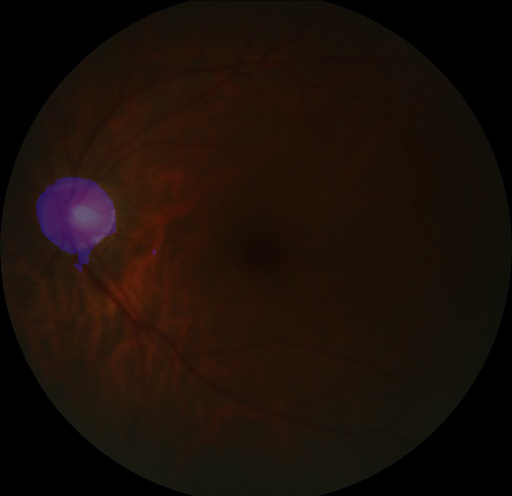

In [13]:
# from PIL import Image
# img=Image.open(path)
from PIL import Image
display(Image.open("/home/aistudio/output/deeplab/visualize_H0005.jpg"))